# Importing The Neccesary Libraries

In [441]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

# Extracting The Data 

The stock data of TATA Motors was obtained using the yfinance module, covering the time period from 1999 to 2023. The data was then extracted and stored for further analysis.

In [442]:
start_date = '1999-01-01'
end_date = '2023-01-31'
ticker = 'TATAMOTORS.NS'

df = yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


Open             High              Low  \
Date                                                                           
1999-01-01 00:00:00+05:30 31.5998859405518 32.1556129455566 31.0537376403809   
1999-01-04 00:00:00+05:30 32.0214729309082 32.6634368896484 31.5615596771240   
1999-01-05 00:00:00+05:30 31.7148647308350 34.2156448364258 31.2836952209473   
1999-01-06 00:00:00+05:30 34.6372299194336 35.3175201416016 33.8707084655762   
1999-01-07 00:00:00+05:30 35.2696113586426 36.8505630493164 35.1642150878906   

                                     Close        Adj Close    Volume  
Date                                                                   
1999-01-01 00:00:00+05:30 31.8394241333008 24.8436126708984  18835718  
1999-01-04 00:00:00+05:30 31.6765384674072 24.7165164947510  18245781  
1999-01-05 00:00:00+05:30 34.2156448364258 26.6977310180664  38938718  
1999-01-06 00:00:00+05:30 35.2217025756836 27.4827327728271  40059886  
1999-01-07 00:00:00+05:30 36.6972579956055 28.6340713500977  35983032

# Data Exploration

In [443]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6029 entries, 1999-01-01 00:00:00+05:30 to 2023-01-30 00:00:00+05:30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6029 non-null   float64
 1   High       6029 non-null   float64
 2   Low        6029 non-null   float64
 3   Close      6029 non-null   float64
 4   Adj Close  6029 non-null   float64
 5   Volume     6029 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 329.7 KB


In [444]:
df.describe()

Open               High                Low  \
count 6029.0000000000000 6029.0000000000000 6029.0000000000000   
mean   202.9963662955353  206.1096589532455  199.4902782242459   
std    157.4856142308831  159.3156915863800  155.3492229765097   
min     11.1145744323730   11.6319770812988   11.0283403396606   
25%     74.0556488037109   75.8569717407227   72.4938583374023   
50%    157.9036102294922  160.3564910888672  154.3444976806641   
75%    325.0000000000000  329.5000000000000  316.7000122070312   
max    600.2120971679688  605.9011230468750  589.8730468750000   

                   Close          Adj Close                  Volume  
count 6029.0000000000000 6029.0000000000000      6029.0000000000000  
mean   202.6723103459191  196.9812350833885  16539782.1671919059008  
std    157.2282602111335  160.1467446735828  21551069.0149662829936  
min     11.2678785324097    9.0994091033936         0.0000000000000  
25%     74.0748062133789   63.4435882568359   5866707.0000000000000  
50%    157.5874176025391  145.5848846435547  10044506.0000000000000  
75%    322.9500122070312  321.7523803710938  18551617.0000000000000  
max    598.1343994140625  597.8922729492188 390577839.0000000000000

# Exploratory Data Analysis

- Mean: The average value of the opening or closing prices. A high mean value suggests that the stock is generally expensive, while a low mean value suggests that it is generally inexpensive.
- Median: The middle value of the opening or closing prices. It represents the typical value of the stock prices and is less sensitive to outliers than the mean.
- Standard Deviation: The measure of the spread of the opening or closing prices. A high standard deviation suggests that the stock prices are widely spread out, while a low standard deviation suggests that they are tightly clustered around the mean.
- Maximum and Minimum values: The highest and lowest values of the opening or closing prices, respectively. These values provide information about the range of the stock prices and whether there have been any drastic changes in the stock price over time.

In [445]:
# Average,Median, STd , max  and min of Closing Price
print("Mean of closing price: ", df['Close'].mean())
print("Median of closing price: ", df['Close'].median())
print("Standard deviation of closing price: ", df['Close'].std())
print("Maximum value Of closing price: ",df['Close'].max())
print("Mininum value Of closing price: ",df['Close'].min())

Mean of closing price:  202.6723103459191
Median of closing price:  157.58741760253906
Standard deviation of closing price:  157.2282602111335
Maximum value Of closing price:  598.1343994140625
Mininum value Of closing price:  11.267878532409668


In [446]:
# Average,Median, STd , max  and min of Open Price 
print("Mean of Opening price: ", df['Open'].mean())
print("Median of Opening price: ", df['Open'].median())
print("Standard deviation of Opening price: ", df['Open'].std())
print("Maximum value Of Opening price: ",df['Open'].max())
print("Mininum value Of Opening price: ",df['Open'].min())

Mean of Opening price:  202.99636629553532
Median of Opening price:  157.9036102294922
Standard deviation of Opening price:  157.48561423088307
Maximum value Of Opening price:  600.2120971679688
Mininum value Of Opening price:  11.114574432373047


It seems that the stock has generally expensive opening and closing prices with a wide spread of values. The mean and median of the opening and closing prices are close to each other, suggesting that the stock prices are normally distributed. The standard deviation values are also relatively high, indicating that the stock prices are widely spread out. The high maximum and low minimum values suggest that the stock prices have gone through some significant changes over time. However, to get a clearer picture of the stock, more data and analysis would be needed.

In [447]:
# Percent Return Of Closing Price
returns = df['Close'].pct_change()
returns.head()

Date
1999-01-01 00:00:00+05:30                NaN
1999-01-04 00:00:00+05:30   -0.0051158483650
1999-01-05 00:00:00+05:30    0.0801573180615
1999-01-06 00:00:00+05:30    0.0294034423162
1999-01-07 00:00:00+05:30    0.0418933586970
Name: Close, dtype: float64

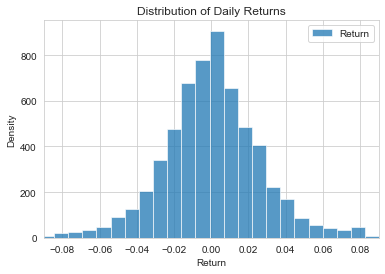

In [448]:
sns.histplot(returns[1:], bins=50,label='Return')
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Distribution of Daily Returns')
plt.legend()
plt.gca().set_xlim(-0.09, 0.09)
plt.show()

Most of the distribution of daily returns of TATA Motors stock is between -0.02 and 0.02 indicates that the stock's daily returns are relatively stable and do not experience large fluctuations. A high concentration of returns in a narrow range suggests that the stock's price changes relatively little from day to day.

In [449]:
# Date With Lowest and Highest Returns
print(returns.idxmin())
print(returns.idxmax())

2019-02-08 00:00:00+05:30
2021-10-13 00:00:00+05:30


Lowest Return By TATA Motors

- Tata Motors share price crashed 22.41% to a 52-week low of 141.90, due to a Rs 27,838 crore non-cash charge to cover impairment at JLR, and a cut in future profit margin outlook.

Highest Return By TATA Motors

- Tata Motors' stock rose 50.82% in five days to close at Rs 506.75 on 13 Oct 2021 due to a 1 billion Dollar investment from TPG Rise   Climate to raise the valuation of the company's passenger electric vehicle business to up to 9.1 billion Dollar.

In [450]:
# Chart Variation Between the Highest Returns and Lowest Returns
Chart = df[["Open","High","Low","Close"]].loc['2019-01-01 00:00:00+05:30':'2022-01-01 00:00:00+05:30']
Chart.iplot(kind='candle')

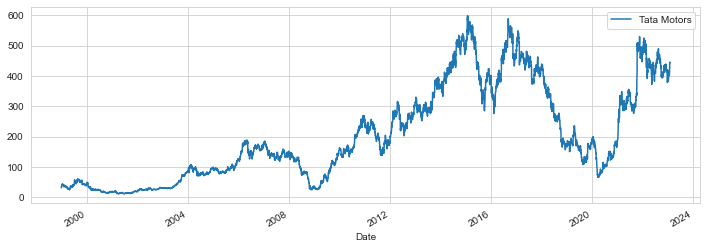

In [451]:
Closed_price = df['Close']
Closed_price.plot(label="Tata Motors",figsize=(12,4))
plt.legend()

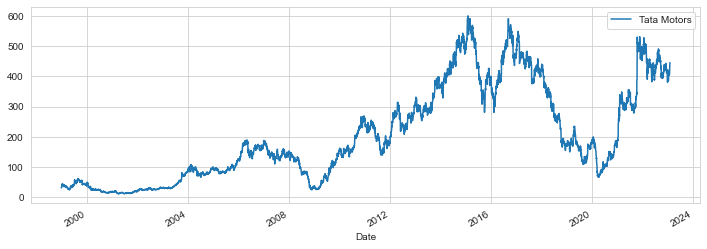

In [452]:
Open_price = df['Open']
Open_price.plot(label="Tata Motors",figsize=(12,4))
plt.legend()

This Is Interactive Version Of Above Plot Using Plotly Iplot() Method.

In [453]:
df[['Open','Close']].iplot()

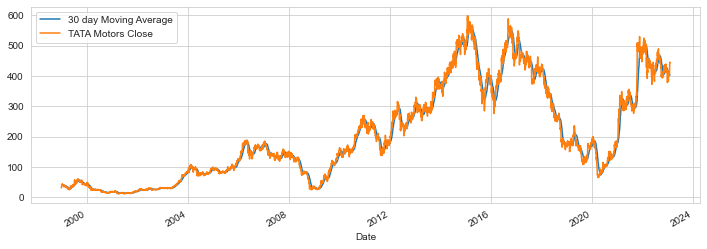

In [454]:
plt.figure(figsize=(12,4))
df['Close'].rolling(window=30).mean().plot(label='30 day Moving Average')
df['Close'].plot(label='TATA Motors Close')
plt.legend()

In [455]:
Moving_Avg = df['Open'].rolling(window=30).mean()
New_df = pd.merge(Moving_Avg,Open_price,on = 'Date')
New_df.rename(columns = {'Open_x':'Moving 30 Day Avg'}, inplace = True)
New_df.rename(columns = {'Open_y':'Open Price'}, inplace = True)
New_df.iplot()

30-day moving average and the closing price trendline are moving in the same direction on a long-term trend for TATA Motors stock, it means that the stock's average price over the past 30 days and the closing price trend are aligned, indicating a strong trend in the stock's price movement.

<AxesSubplot:>

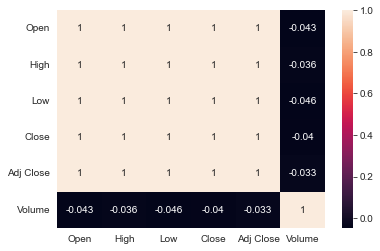

In [456]:
sns.heatmap(df.corr(),annot=True)

In [457]:
df['Close'].loc['2022-01-01 00:00:00+05:30':'2023-01-30 00:00:00+05:30'].ta_plot(study='sma',periods=[7,21,55])

The plot will show the stock price with the three moving averages superimposed. Traders and investors can use the plot to help identify trends and make investment decisions. The moving averages can also be used to determine the strength of a trend and provide potential buy or sell signals based on the relationship between the stock price and the moving averages.

In [458]:
df[['Open']].loc['2022-01-30 00:00:00+05:30':'2023-01-30 00:00:00+05:30'].ta_plot(study='boll')

In [459]:
df[['Close']].loc['2022-01-30 00:00:00+05:30':'2023-01-30 00:00:00+05:30'].ta_plot(study='boll')

The plot will show the stock price with the Bollinger Bands superimposed. Traders and investors can use the plot to help identify trends and make investment decisions. The Bollinger Bands can also be used to determine the volatility of a stock and provide potential buy or sell signals based on the stock price relative to the upper and lower bands. When the stock price is near the upper band, it may be overbought, and when it is near the lower band, it may be oversold.

# Feature Engineering

In [460]:
# Weekly Moving Average
df['ma_7'] = df['Close'].rolling(window=7).mean()

Moving averages are used in technical analysis to smooth out fluctuations in the stock price and identify trends over a longer time period. By calculating different moving averages with different time periods, traders and investors can identify different trends and determine the strength of those trends. For example, a 7-day moving average will give a quicker response to price changes compared to a 90-day moving average.

In [461]:
# Bollinger Bands for a Close price

df['ma_20'] = df['Close'].rolling(window=20).mean()

df['std_20'] = df['Close'].rolling(window=20).std()

df['upper_band'] = df['ma_20'] + 2 * df['std_20']

df['lower_band'] = df['ma_20'] - 2 * df['std_20']

Bollinger Bands are a technical analysis tool used to identify when a stock price is overbought or oversold.The Bollinger Band formula is used to calculate an upper and lower band around a moving average of a stock price. 
The formula is as follows:

Upper Band = Moving Average (MA) + 2 * Standard Deviation (STD)
Lower Band = Moving Average (MA) - 2 * Standard Deviation (STD)

MA = Moving average of the stock price over a specified time period (usually 20 days)
STD = Standard deviation of the stock price over the same specified time period

The upper band represents overbought conditions, while the lower band represents oversold conditions. When the stock price moves outside the bands, it can signal a potential trend reversal.

In [462]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ma_7', 'ma_20',
       'std_20', 'upper_band', 'lower_band'],
      dtype='object')

In [463]:
df = df.drop(['High', 'Low','Adj Close', 'Volume'],axis=1)

In [464]:
df.fillna(df.mean(), inplace=True)

In [465]:
df.head()

Open            Close              ma_7  \
Date                                                                            
1999-01-01 00:00:00+05:30 31.5998859405518 31.8394241333008 202.6427749197136   
1999-01-04 00:00:00+05:30 32.0214729309082 31.6765384674072 202.6427749197136   
1999-01-05 00:00:00+05:30 31.7148647308350 34.2156448364258 202.6427749197136   
1999-01-06 00:00:00+05:30 34.6372299194336 35.2217025756836 202.6427749197136   
1999-01-07 00:00:00+05:30 35.2696113586426 36.6972579956055 202.6427749197136   

                                      ma_20          std_20        upper_band  \
Date                                                                            
1999-01-01 00:00:00+05:30 202.5949508569244 8.3572632527374 219.3094773623992   
1999-01-04 00:00:00+05:30 202.5949508569244 8.3572632527374 219.3094773623992   
1999-01-05 00:00:00+05:30 202.5949508569244 8.3572632527374 219.3094773623992   
1999-01-06 00:00:00+05:30 202.5949508569244 8.3572632527374 219.3094773623992   
1999-01-07 00:00:00+05:30 202.5949508569244 8.3572632527374 219.3094773623992   

                                 lower_band  
Date                                         
1999-01-01 00:00:00+05:30 185.8804243514497  
1999-01-04 00:00:00+05:30 185.8804243514497  
1999-01-05 00:00:00+05:30 185.8804243514497  
1999-01-06 00:00:00+05:30 185.8804243514497  
1999-01-07 00:00:00+05:30 185.8804243514497

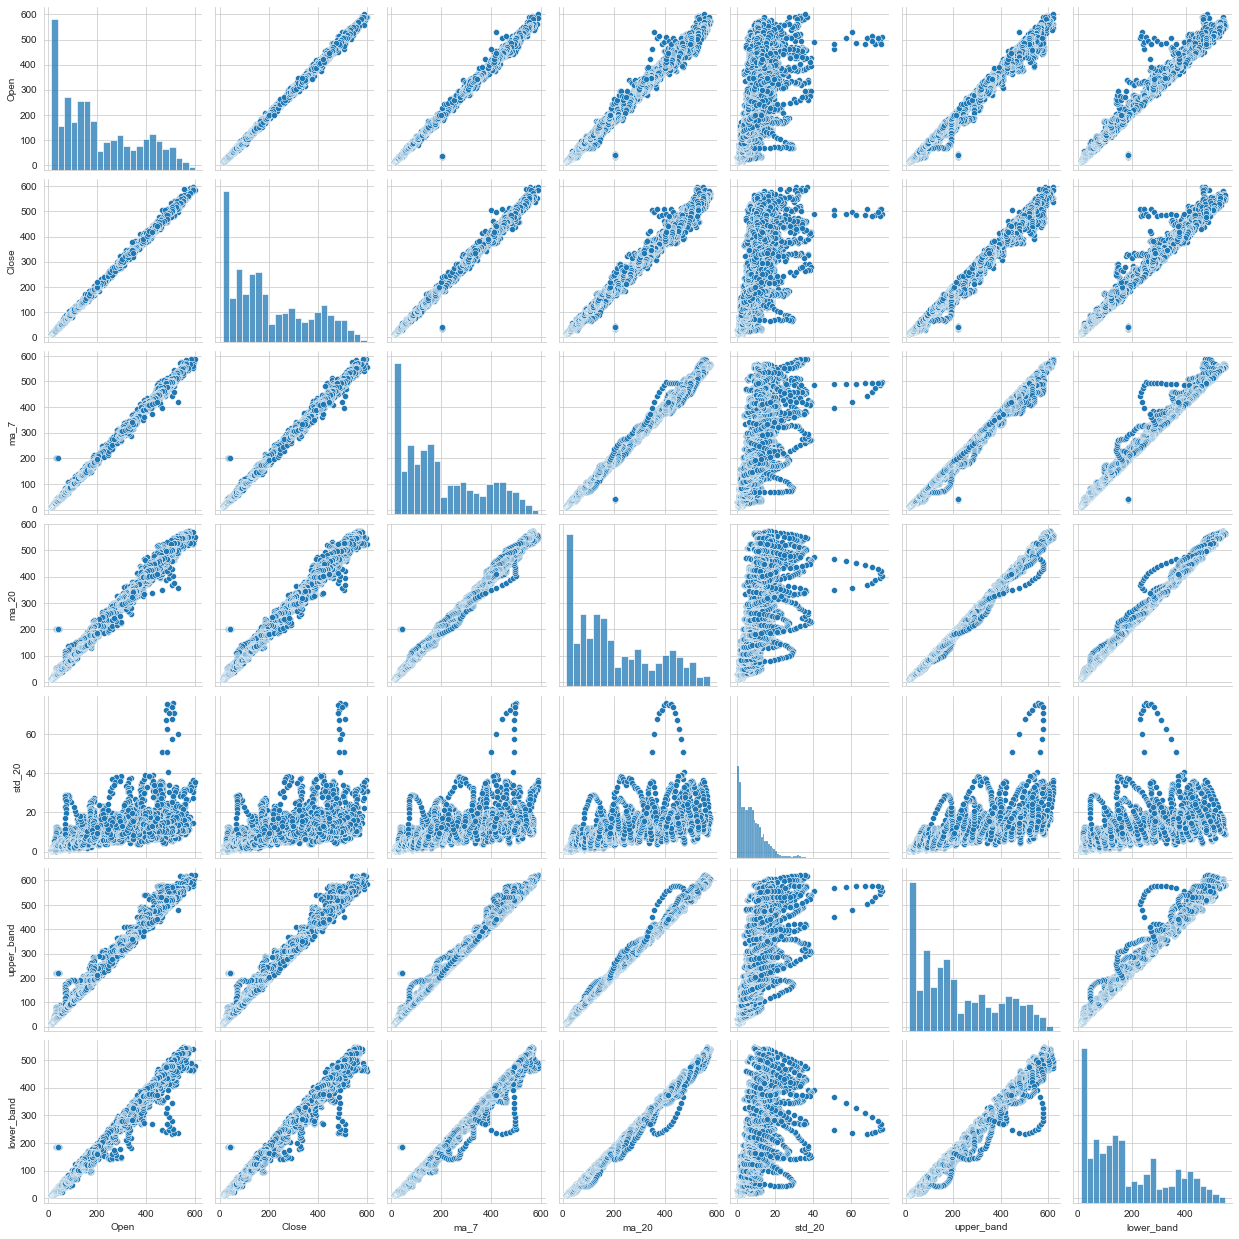

In [466]:
sns.pairplot(df)

<AxesSubplot:>

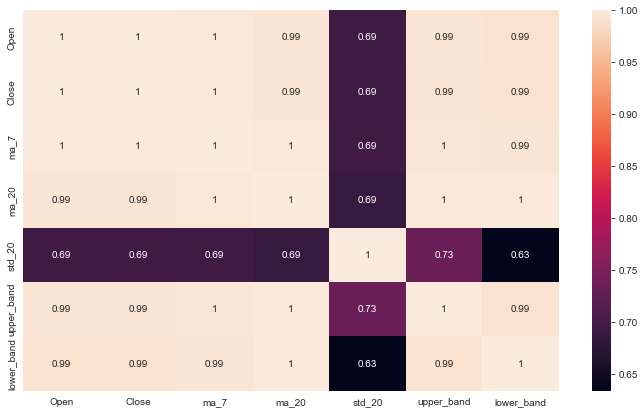

In [467]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

The close price of the stock shows a strong correlation with its 7-day moving average, as well as with the upper and lower bands of Bollinger Bands. The change in percentage between the open and close prices is highly associated with the stock's momentum and log returns.

# Model Training

In [469]:
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled

In [470]:
X = df.drop(['Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)

model_rf = RandomForestRegressor(n_jobs=-1)
model_rf.fit(X_train, y_train)

model_svr = SVR()
model_svr.fit(X_train, y_train)

In [ ]:
y_predict_lr = model_lr.predict(X_test)
y_predict_rf = model_rf.predict(X_test)
y_predict_svr = model_svr.predict(X_test)

In [ ]:
print("R2 score for linear regression: ", r2_score(y_test, y_predict_lr))
print("R2 score for random forest: ", r2_score(y_test, y_predict_rf))
print("R2 score for SVR: ", r2_score(y_test, y_predict_svr))

### Based on the model accuracy of 0.9998699215427905, it can be concluded that the Linear Regression model is the best suitable model for this data.

In [ ]:
y_test_predict = y_predict_lr
score = r2_score(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("R2_Score:",score)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

In [ ]:
pd.options.display.float_format = '{:.13f}'.format
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check['difference'] = y_test - y_test_predict
test_check.sort_index()

In [ ]:
sns.scatterplot(y_test,y_test_predict)

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = mean_absolute_percentage_error(y_test, y_test_predict)

In [ ]:
mape